In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
#Using datesets features

train = fetch_20newsgroups(subset='train',
                           categories=['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'], 
                           remove=['headers', 'footers','quotes'])
test = fetch_20newsgroups(subset='test', 
                          categories=['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'], 
                            remove=['headers', 'footers','quotes'])


In [14]:
(np.array(train.target_names)[train.target[:3]])


array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [0]:
len(train.target)

#Pulling out word counts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(train.data).todense() 

In [26]:
len(vectors)

2034

In [27]:
vocab = np.array(vectorizer.get_feature_names()) 
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)
print(U.shape) #hashtags with words
print(Vh.shape) #words with hashtags

CPU times: user 1min 17s, sys: 3.7 s, total: 1min 21s
Wall time: 41.5 s
(2034, 2034)


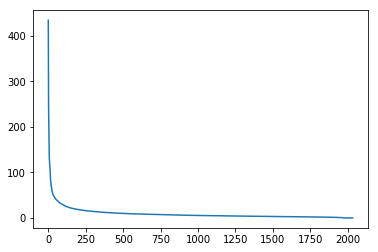

In [28]:
plt.plot(s)

In [0]:
tops, tw = 6, 8
def topics(a):
    top = lambda t: [vocab[i] for i in np.argsort(t)[:-tw-1:-1]]
    topic_words = ([top(t) for t in a])
    return [' '.join(t) for t in topic_words]


In [33]:
topics(Vh)

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material',
 'larson theory universe physical den p2 p3 p1',
 'den p2 p3 p1 radius p12 p23 p13',
 'judas hanging reply db mr decenso greek death',
 'atheists atheism religious people religion prophecy matthew messiah',
 'space graphics people like sgi research package society',
 'telescope word national observatory satellite atheists infrared prefix',
 'people like nasa don think just time gay',
 'ra s